In [1]:
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt

from nonlinear_walk import NonlinearRandomWalk

In [2]:
email = pd.read_csv(
    "data/email-Eu-core.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
email



,start_node,end_node
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7
...,...,...
25566,420,143
25567,174,859
25568,440,460
25569,52,786


In [3]:
G = nx.from_pandas_edgelist(email, "start_node", "end_node")
G.number_of_edges(), G.number_of_nodes()

(16706, 1005)

In [4]:
import random

def remove_nodes_by_distance(graph, source_node, max_distance):
    nodes_to_remove = set(G.nodes)
    for distance in range(max_distance):
        nodes_to_remove -= nx.descendants_at_distance(graph, source_node, distance)
    graph.remove_nodes_from(nodes_to_remove)

In [5]:
G.remove_edges_from(nx.selfloop_edges(G))
remove_nodes_by_distance(G, random.choice(list(G.nodes)), 3)
G.number_of_edges(), G.number_of_nodes()


(5055, 292)

In [6]:
G

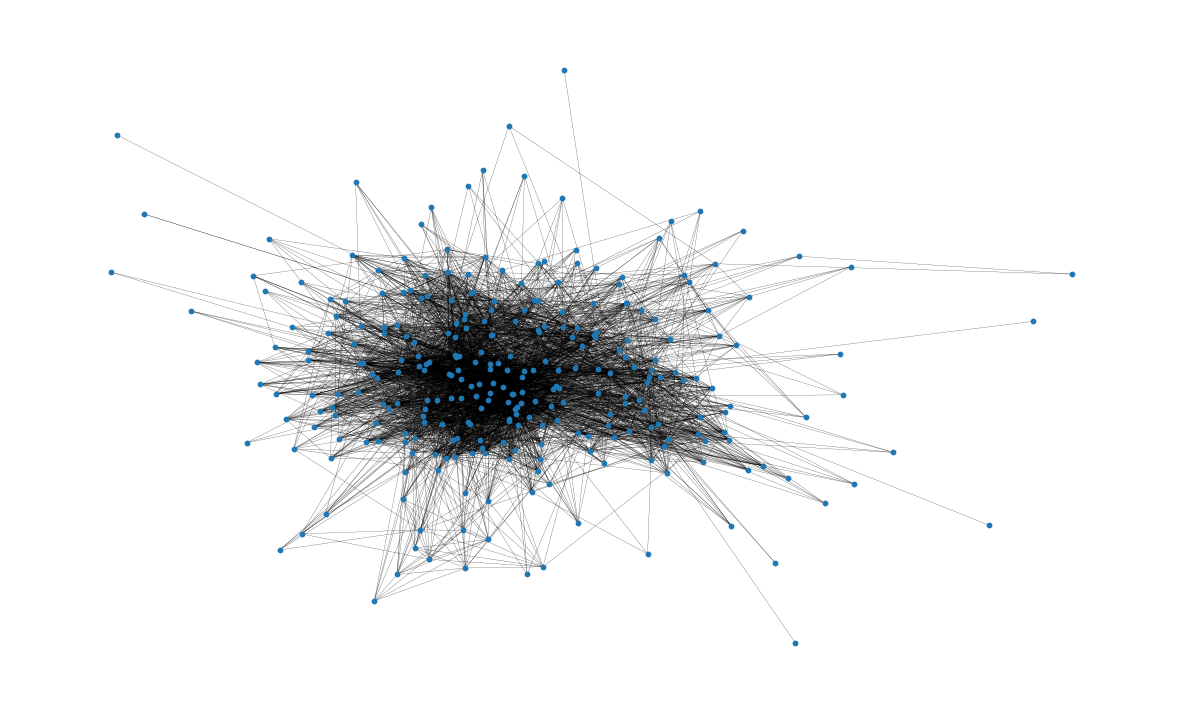

In [7]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [8]:
import numpy as np
G = nx.convert_node_labels_to_integers(G, first_label=0)

initial_node = [0]
initial_pr = np.zeros(G.number_of_nodes()).reshape(-1, 1)
initial_pr[initial_node] = 1 / len(initial_node)
graph_walk = NonlinearRandomWalk(G, initial_pr=initial_pr)

MovieWriter imagemagick unavailable; using Pillow instead.


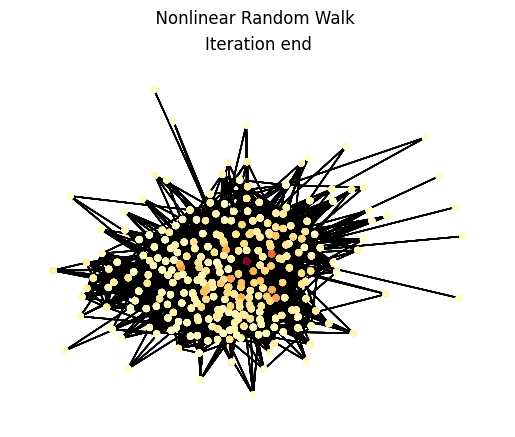

In [9]:
graph_walk.get_visualization(max_iter=2, filename="email_1iter.gif")


MovieWriter imagemagick unavailable; using Pillow instead.


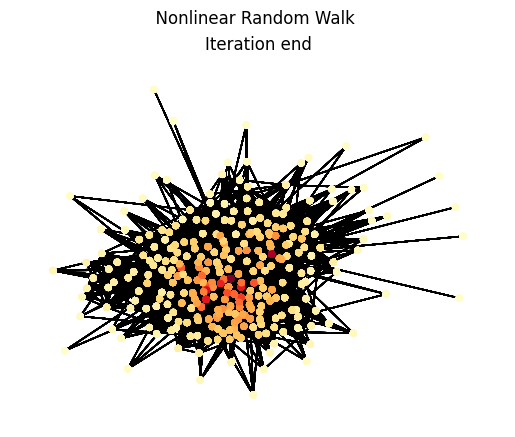

In [13]:
graph_walk.get_visualization(alpha=-5, max_iter=1000, tol=1e-4, filename='email_2000iter_1init_pr_alpha-5___vis.gif')


In [11]:
graph_walk.calculate_for_alphas(-6, 6, 100, tol=1e-6, max_iter=200)

OSError: [Errno 22] Invalid argument: 'plots/nonlinear_random_walk-2024-01-19T17:36:47.017312.png'

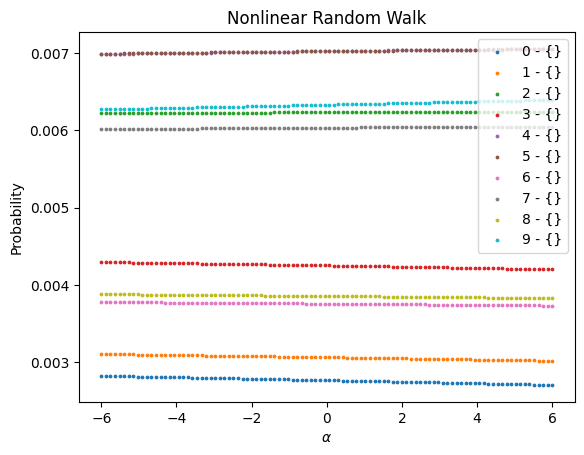

In [12]:
graph_walk.plot_for_alphas(list(G.nodes)[:10])


In [ ]:
graph_walk.plot_for_alphas(list(G.nodes))
